# Evaluation Notebook

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import json

## Load metrics

In [3]:
with open('../data/metrics/classification_report_lr.json', 'r') as f:
    metrics_lr = json.load(f)

In [4]:
with open('../data/metrics/classification_report_svm.json', 'r') as f:
    metrics_svm = json.load(f)

In [7]:
with open('../data/metrics/confusion_matrix_lr.json', 'r') as f:
    cm_lr = np.array(json.load(f))

In [8]:
with open('../data/metrics/confusion_matrix_svm.json', 'r') as f:
    cm_svm = np.array(json.load(f))

## Convert metrics to DataFrame

In [5]:
metrics_lr_df = pd.DataFrame(metrics_lr).transpose()
metrics_svm_df = pd.DataFrame(metrics_svm).transpose()

## Display metrics

In [9]:
f1_weighted_lr = metrics_lr_df.loc['weighted avg', 'f1-score']
f1_weighted_svm = metrics_svm_df.loc['weighted avg', 'f1-score']

In [18]:
f1_weighted = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM'],
    'Weighted F1 Score': [f1_weighted_lr, f1_weighted_svm]
})

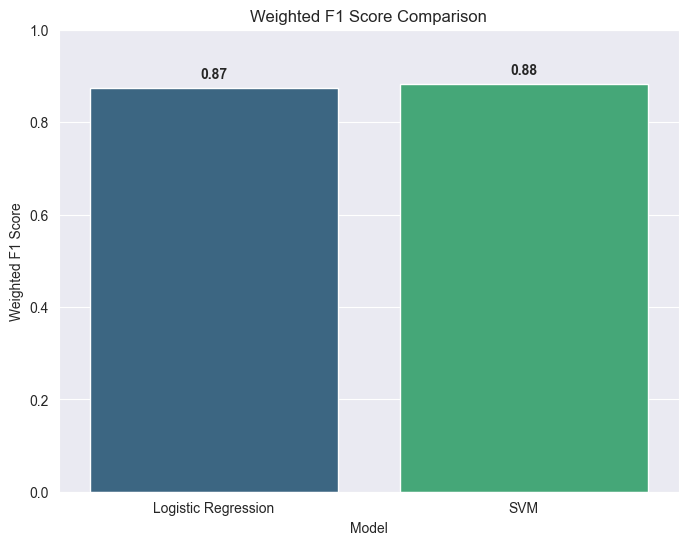

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(data=f1_weighted, x='Model', y='Weighted F1 Score', hue='Model', palette='viridis', legend=False)
plt.title('Weighted F1 Score Comparison')
plt.ylabel('Weighted F1 Score')
plt.ylim(0, 1)
for i, v in enumerate([f1_weighted_lr, f1_weighted_svm]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('../data/metrics/weighted_f1_score_comparison.png')
plt.show()

## Plot confusion matrices

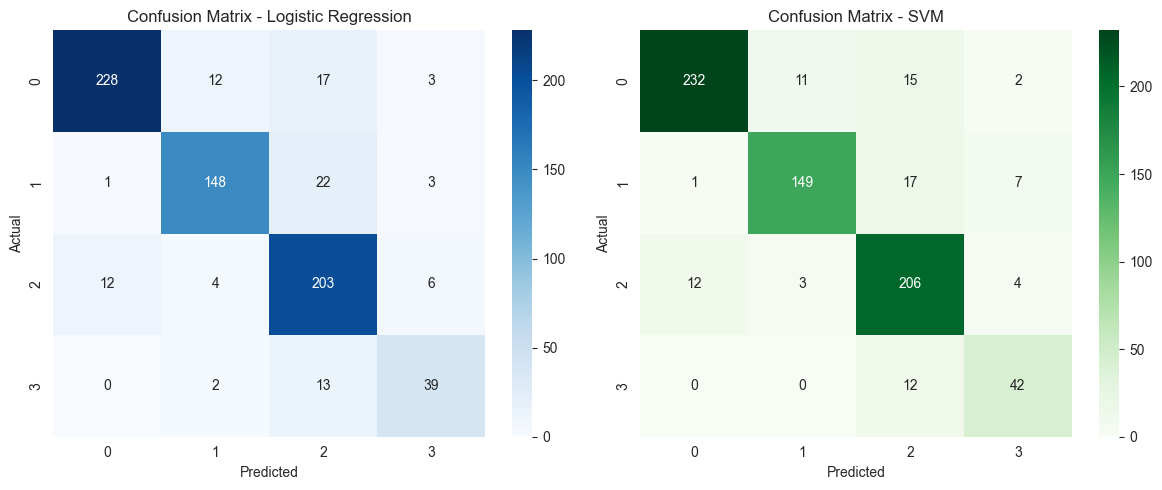

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../data/metrics/confusion_matrices.png')
plt.show()